In [1]:
#xlsx to csv
file = 'MainData.xlsx'
import numpy as np
import pandas as pd
import jieba
import jieba.analyse
import codecs
data = pd.read_excel(file,sheet_name=0)
data_title_dep = data[["detail_en"]].copy()
data_title_dep.to_csv('MainData(English).csv',index=0, encoding='utf_8_sig')


In [2]:
import numpy as np
import pandas as pd
import jieba
import jieba.analyse
import codecs

#Data
rows=pd.read_csv('MainData(English).csv', header=0,encoding='utf-8',dtype=str).astype(str)

stopwords = ['The','.','and','has',',','#','no','the','a','of','was','He','She','he','she',
             'having','at','on','On','At','in','In','had','with','(',')','from',
             'to','end','in','you','is','that','for','on','it','as','your','...','14', 
             'this','or','20','40','27','30','13','21','26','10','15','22',  
             '32','31','1','2','4','5','6','7','8','9','0','10','11','12','13',  
             '12','13','15','16','17','25','33','35','36','18','23','19','24',  
             '38','29','34','37','000',' ']  

segments = []
for index, row in rows.iterrows():
    content = row[0]
    #TextRank
    words = jieba.cut(content)
    splitedStr = ''
    for word in words:
        # Count
        if word not in stopwords:
            segments.append({'word':word, 'count':1})
            splitedStr += word + ' '
            
dfSg = pd.DataFrame(segments)

#Sum
dfWord = pd.DataFrame(dfSg.groupby('word')['count'].sum()).sort_values(by="count" , ascending=False)
#To csv
dfWord.to_csv('keywords(English).csv', encoding='utf_8_sig')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\10605G\AppData\Local\Temp\jieba.cache
Loading model cost 0.633 seconds.
Prefix dict has been built successfully.


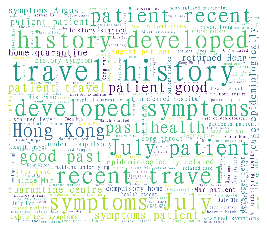

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
font_path = r'E:\Intern_DataVisualization\group4\wordcloud\simfang.ttf'
list1 = dfSg['word'].values.tolist()
seg_list=' '.join([str(elem) for elem in list1])
wc = WordCloud(background_color="white",width=1000, height=860, margin=2,font_path=font_path)
wc.generate(seg_list)
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('NLP(ENG).png')